In [1]:
import mylib
import numpy as np
from matplotlib import pyplot as plt

In [32]:
size = 20
A = 5*np.eye(size) + 0.1*np.random.rand(size)
print("spectral radius", np.max(np.abs(np.linalg.eigvals(A))))
print("determinant", np.linalg.det(A))

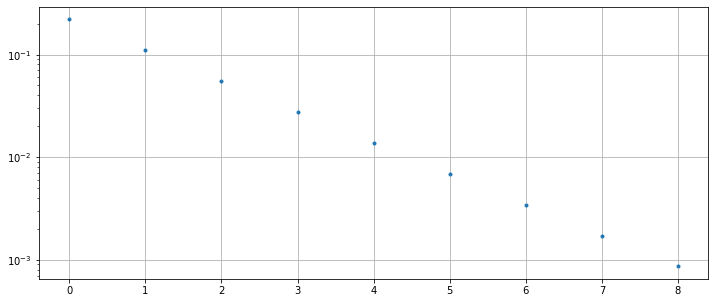

In [33]:
invA = np.linalg.inv(A)
errors = []
for n in range(1, 10):
    appoximateInvA = mylib.approxInverseEpsilon(A, n, 0.1)
    errors.append(np.linalg.norm(invA-appoximateInvA))

plt.figure(figsize=(12,5))
plt.semilogy(errors, '.')
plt.grid()
plt.show()